In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/drive/MyDrive/transcriptomics-data/detectable_genes.csv')

data.head()

,Gene_symbol,NAME,Foldchange,PValue,FDR,1posH,2posH,3posH,4posH,5posH,6posH,1negH,2negH,3negH,4negH,5negH,6negH
0,0610007P14Rik,RIKEN cDNA 0610007P14 gene,1.096333,0.237007,0.999902,24.061225,22.944972,21.897173,19.840338,27.577471,21.312612,21.029999,24.146191,19.102242,20.951491,20.477456,19.736071
1,0610009B22Rik,RIKEN cDNA 0610009B22 gene,-1.025547,0.740390,0.999902,12.942468,10.845574,11.913660,10.309783,12.922427,11.597676,12.474068,12.291472,12.133346,11.639717,11.900859,11.783808
2,0610009L18Rik,RIKEN cDNA 0610009L18 gene,-1.021398,0.916932,0.999902,0.823612,0.564221,0.998351,1.258753,1.949193,0.979025,1.199430,1.310258,0.746667,0.440422,1.329705,1.662746
3,0610009O20Rik,RIKEN cDNA 0610009O20 gene,-1.050696,0.427450,0.999902,40.533458,38.993914,36.273433,38.062279,34.941088,35.621433,39.461234,40.368439,39.946707,39.889625,39.292780,36.941877
4,0610010B08Rik,RIKEN cDNA 0610010B08 gene,-1.221902,0.116814,0.999902,12.530663,28.211031,19.301460,31.229051,29.021317,24.475614,32.744429,43.612888,31.111143,22.398591,22.073102,24.796602


<ipython-input-7-b83de77c58d7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['1posH'], shade=True)


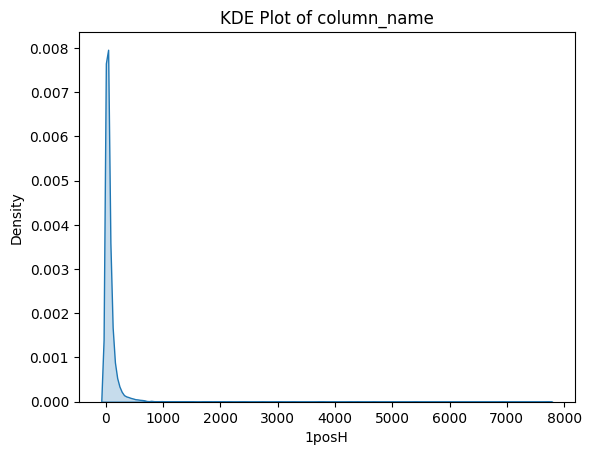

In [ ]:
numeric_columns = data.drop(columns=['Gene_symbol', 'NAME'])

sns.kdeplot(data['1posH'], shade=True)
plt.title('KDE Plot of column_name')
plt.show()

In [2]:
from sklearn.preprocessing import LabelEncoder
label_e=LabelEncoder()
data['Gene_symbol']=label_e.fit_transform(data['Gene_symbol'])
data['NAME']=label_e.fit_transform(data['NAME'])

In [3]:
df_numerical_features = data.select_dtypes(exclude='object')
df_categorical_features = data.select_dtypes(include='object')

num_cols = list(df_numerical_features)
cat_cols = list(df_categorical_features)

In [4]:
!pip install ydata-synthetic==1.1.0

In [6]:
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
#Defining the training parameters
noise_dim = 128
dim = 128
batch_size = 500

log_step = 100
epochs = 100
learning_rate = [5e-4, 3e-3]
beta_1 = 0.5
beta_2 = 0.9
models_dir = '../cache'

gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

synth = RegularSynthesizer(modelname='dragan', model_parameters=gan_args, n_discriminator=2)
synth.fit(data, train_args, num_cols, cat_cols)

synth.save('dragan-trans.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
  1%|          | 1/100 [00:11<18:38, 11.30s/it]

Epoch: 0 | disc_loss: 0.499584823846817 | gen_loss: -1.0


  2%|▏         | 2/100 [00:21<17:25, 10.67s/it]

Epoch: 1 | disc_loss: 2.503105640411377 | gen_loss: -1.0


  3%|▎         | 3/100 [00:31<16:55, 10.47s/it]

Epoch: 2 | disc_loss: 1.0542106628417969 | gen_loss: -1.0


  4%|▍         | 4/100 [00:41<16:35, 10.37s/it]

Epoch: 3 | disc_loss: 0.5302153825759888 | gen_loss: -1.0


  5%|▌         | 5/100 [00:49<14:42,  9.29s/it]

Epoch: 4 | disc_loss: -0.1748335361480713 | gen_loss: -0.07383740693330765


  6%|▌         | 6/100 [00:57<13:59,  8.93s/it]

Epoch: 5 | disc_loss: -0.32752835750579834 | gen_loss: -0.23776285350322723


  7%|▋         | 7/100 [01:04<12:57,  8.35s/it]

Epoch: 6 | disc_loss: -0.6658616662025452 | gen_loss: -0.017629271373152733


  8%|▊         | 8/100 [01:14<13:43,  8.95s/it]

Epoch: 7 | disc_loss: -0.29732751846313477 | gen_loss: -2.302365381678939e-10


  9%|▉         | 9/100 [01:23<13:21,  8.81s/it]

Epoch: 8 | disc_loss: -0.49635595083236694 | gen_loss: -1.947470240626359e-10


 10%|█         | 10/100 [01:30<12:19,  8.22s/it]

Epoch: 9 | disc_loss: -0.5875239372253418 | gen_loss: -8.590799919312372e-14


 11%|█         | 11/100 [01:38<12:07,  8.18s/it]

Epoch: 10 | disc_loss: -0.7916984558105469 | gen_loss: -0.0019910428673028946


 12%|█▏        | 12/100 [01:48<12:54,  8.80s/it]

Epoch: 11 | disc_loss: -0.6629081964492798 | gen_loss: -4.880838559984113e-07


 13%|█▎        | 13/100 [01:58<13:23,  9.23s/it]

Epoch: 12 | disc_loss: -0.7585468888282776 | gen_loss: -3.0888200330814186e-10


 14%|█▍        | 14/100 [02:09<13:39,  9.53s/it]

Epoch: 13 | disc_loss: -0.6944277882575989 | gen_loss: -6.956262649238099e-11


 15%|█▌        | 15/100 [02:16<12:44,  8.99s/it]

Epoch: 14 | disc_loss: -0.8233815431594849 | gen_loss: -4.050633717334051e-10


 16%|█▌        | 16/100 [02:24<12:08,  8.67s/it]

Epoch: 15 | disc_loss: -0.6911166906356812 | gen_loss: -2.9378898691244158e-21


 17%|█▋        | 17/100 [02:31<11:16,  8.15s/it]

Epoch: 16 | disc_loss: -0.7765271663665771 | gen_loss: -2.434815370155885e-12


 18%|█▊        | 18/100 [02:41<11:59,  8.77s/it]

Epoch: 17 | disc_loss: -0.8288943767547607 | gen_loss: -1.118844972995258e-15


 19%|█▉        | 19/100 [02:49<11:29,  8.51s/it]

Epoch: 18 | disc_loss: -0.8165490031242371 | gen_loss: -1.0620370005653967e-07


 20%|██        | 20/100 [02:56<10:45,  8.06s/it]

Epoch: 19 | disc_loss: -0.8550781607627869 | gen_loss: -1.1249798035350977e-06


 21%|██        | 21/100 [03:07<11:28,  8.71s/it]

Epoch: 20 | disc_loss: -0.8165661096572876 | gen_loss: -4.624604085096129e-12


 22%|██▏       | 22/100 [03:14<10:49,  8.33s/it]

Epoch: 21 | disc_loss: -0.7102882862091064 | gen_loss: -0.05079655721783638


 23%|██▎       | 23/100 [03:22<10:22,  8.08s/it]

Epoch: 22 | disc_loss: -0.8007680177688599 | gen_loss: -1.061155001560756e-16


 24%|██▍       | 24/100 [03:32<11:03,  8.73s/it]

Epoch: 23 | disc_loss: -0.8704284429550171 | gen_loss: -6.062937833671407e-21


 25%|██▌       | 25/100 [03:42<11:37,  9.30s/it]

Epoch: 24 | disc_loss: -0.8498826026916504 | gen_loss: -4.983444759183383e-16


 26%|██▌       | 26/100 [03:50<10:42,  8.68s/it]

Epoch: 25 | disc_loss: -0.8142284750938416 | gen_loss: -8.922982556066721e-17


 27%|██▋       | 27/100 [03:58<10:25,  8.57s/it]

Epoch: 26 | disc_loss: -0.7486176490783691 | gen_loss: -2.5085088086601592e-12


 28%|██▊       | 28/100 [04:08<10:52,  9.07s/it]

Epoch: 27 | disc_loss: -0.7640173435211182 | gen_loss: -8.755706223782555e-25


 29%|██▉       | 29/100 [04:15<10:05,  8.53s/it]

Epoch: 28 | disc_loss: -0.857247531414032 | gen_loss: -2.6757017622003332e-05


 30%|███       | 30/100 [04:26<10:32,  9.04s/it]

Epoch: 29 | disc_loss: -0.8779429197311401 | gen_loss: -2.564119536704193e-19


 31%|███       | 31/100 [04:34<10:12,  8.87s/it]

Epoch: 30 | disc_loss: -0.7631306052207947 | gen_loss: -2.1230436977664677e-14


 32%|███▏      | 32/100 [04:41<09:31,  8.40s/it]

Epoch: 31 | disc_loss: -0.82097327709198 | gen_loss: -3.241305890355761e-08


 33%|███▎      | 33/100 [04:50<09:23,  8.42s/it]

Epoch: 32 | disc_loss: -0.8287450671195984 | gen_loss: -4.2332833066890604e-14


 34%|███▍      | 34/100 [05:00<09:51,  8.96s/it]

Epoch: 33 | disc_loss: -0.842025101184845 | gen_loss: -1.3618237915125064e-07


 35%|███▌      | 35/100 [05:08<09:11,  8.49s/it]

Epoch: 34 | disc_loss: -0.8380904197692871 | gen_loss: -3.8134703728154307e-11


 36%|███▌      | 36/100 [05:18<09:36,  9.01s/it]

Epoch: 35 | disc_loss: -0.7949238419532776 | gen_loss: -2.5020165494993307e-08


 37%|███▋      | 37/100 [05:26<09:15,  8.82s/it]

Epoch: 36 | disc_loss: -0.7901607751846313 | gen_loss: -4.9766909796744585e-05


 38%|███▊      | 38/100 [05:33<08:39,  8.39s/it]

Epoch: 37 | disc_loss: 0.09905970096588135 | gen_loss: -0.017675476148724556


 39%|███▉      | 39/100 [05:42<08:32,  8.40s/it]

Epoch: 38 | disc_loss: 7.532538414001465 | gen_loss: -0.032665081322193146


 40%|████      | 40/100 [05:52<08:56,  8.95s/it]

Epoch: 39 | disc_loss: 0.4670860767364502 | gen_loss: -0.28804388642311096


 41%|████      | 41/100 [06:02<09:10,  9.33s/it]

Epoch: 40 | disc_loss: 0.2624630928039551 | gen_loss: -0.2917048931121826


 42%|████▏     | 42/100 [06:10<08:29,  8.78s/it]

Epoch: 41 | disc_loss: 0.9341619610786438 | gen_loss: -0.6533409953117371


 43%|████▎     | 43/100 [06:18<08:13,  8.66s/it]

Epoch: 42 | disc_loss: 0.5745612382888794 | gen_loss: -0.8446471095085144


 44%|████▍     | 44/100 [06:28<08:31,  9.13s/it]

Epoch: 43 | disc_loss: 0.5793759822845459 | gen_loss: -0.3502586781978607


 45%|████▌     | 45/100 [06:36<07:53,  8.61s/it]

Epoch: 44 | disc_loss: 3.4943313598632812 | gen_loss: -0.5053857564926147


 46%|████▌     | 46/100 [06:46<08:11,  9.10s/it]

Epoch: 45 | disc_loss: 0.6284786462783813 | gen_loss: -0.08223611861467361


 47%|████▋     | 47/100 [06:56<08:20,  9.44s/it]

Epoch: 46 | disc_loss: 0.7324790954589844 | gen_loss: -0.13152804970741272


 48%|████▊     | 48/100 [07:04<07:43,  8.92s/it]

Epoch: 47 | disc_loss: 0.30599403381347656 | gen_loss: -0.22725141048431396


 49%|████▉     | 49/100 [07:12<07:18,  8.60s/it]

Epoch: 48 | disc_loss: 0.44323214888572693 | gen_loss: -0.37667229771614075


 50%|█████     | 50/100 [07:22<07:34,  9.09s/it]

Epoch: 49 | disc_loss: 0.5435068607330322 | gen_loss: -0.2991589605808258


 51%|█████     | 51/100 [07:32<07:41,  9.43s/it]

Epoch: 50 | disc_loss: 0.09965550899505615 | gen_loss: -0.49329856038093567


 52%|█████▏    | 52/100 [07:43<07:44,  9.67s/it]

Epoch: 51 | disc_loss: 0.7387924194335938 | gen_loss: -0.2632960379123688


 53%|█████▎    | 53/100 [07:53<07:42,  9.83s/it]

Epoch: 52 | disc_loss: 1.0786772966384888 | gen_loss: -0.31015369296073914


 54%|█████▍    | 54/100 [08:03<07:37,  9.95s/it]

Epoch: 53 | disc_loss: 1.12583327293396 | gen_loss: -0.3528432846069336


 55%|█████▌    | 55/100 [08:13<07:31, 10.03s/it]

Epoch: 54 | disc_loss: 0.36648422479629517 | gen_loss: -0.2986038029193878


 56%|█████▌    | 56/100 [08:23<07:24, 10.09s/it]

Epoch: 55 | disc_loss: 1.0940043926239014 | gen_loss: -0.828986644744873


 57%|█████▋    | 57/100 [08:31<06:37,  9.25s/it]

Epoch: 56 | disc_loss: -0.17537277936935425 | gen_loss: -0.16895341873168945


 58%|█████▊    | 58/100 [08:39<06:17,  9.00s/it]

Epoch: 57 | disc_loss: 2.300413131713867 | gen_loss: -0.7097646594047546


 59%|█████▉    | 59/100 [08:49<06:23,  9.37s/it]

Epoch: 58 | disc_loss: 0.0129050612449646 | gen_loss: -0.4804403781890869


 60%|██████    | 60/100 [09:00<06:24,  9.62s/it]

Epoch: 59 | disc_loss: -0.05932994186878204 | gen_loss: -0.2643581032752991


 61%|██████    | 61/100 [09:07<05:48,  8.93s/it]

Epoch: 60 | disc_loss: 0.3713061213493347 | gen_loss: -0.30885040760040283


 62%|██████▏   | 62/100 [09:15<05:33,  8.77s/it]

Epoch: 61 | disc_loss: -0.13036511838436127 | gen_loss: -0.22235937416553497


 63%|██████▎   | 63/100 [09:26<05:40,  9.20s/it]

Epoch: 62 | disc_loss: 0.25598403811454773 | gen_loss: -0.5983787178993225


 64%|██████▍   | 64/100 [09:33<05:11,  8.65s/it]

Epoch: 63 | disc_loss: 0.5852988362312317 | gen_loss: -0.566239595413208


 65%|██████▌   | 65/100 [09:41<04:59,  8.57s/it]

Epoch: 64 | disc_loss: 0.2938764691352844 | gen_loss: -0.6428496837615967


 66%|██████▌   | 66/100 [09:49<04:47,  8.46s/it]

Epoch: 65 | disc_loss: 0.2734883725643158 | gen_loss: -0.7727256417274475


 67%|██████▋   | 67/100 [09:57<04:27,  8.12s/it]

Epoch: 66 | disc_loss: 0.2896418571472168 | gen_loss: -0.6131037473678589


 68%|██████▊   | 68/100 [10:05<04:22,  8.21s/it]

Epoch: 67 | disc_loss: 0.37793007493019104 | gen_loss: -0.5837851166725159


 69%|██████▉   | 69/100 [10:15<04:33,  8.82s/it]

Epoch: 68 | disc_loss: 0.46386855840682983 | gen_loss: -0.3682153522968292


 70%|███████   | 70/100 [10:23<04:10,  8.35s/it]

Epoch: 69 | disc_loss: 0.35393959283828735 | gen_loss: -0.44396859407424927


 71%|███████   | 71/100 [10:33<04:18,  8.91s/it]

Epoch: 70 | disc_loss: -0.2747456729412079 | gen_loss: -0.2411070317029953


 72%|███████▏  | 72/100 [10:43<04:20,  9.31s/it]

Epoch: 71 | disc_loss: 3.1514997482299805 | gen_loss: -0.9112904667854309


 73%|███████▎  | 73/100 [10:51<03:57,  8.80s/it]

Epoch: 72 | disc_loss: 0.0500967800617218 | gen_loss: -0.6652992963790894


 74%|███████▍  | 74/100 [10:59<03:44,  8.62s/it]

Epoch: 73 | disc_loss: 0.025918304920196533 | gen_loss: -0.439584344625473


 75%|███████▌  | 75/100 [11:07<03:33,  8.53s/it]

Epoch: 74 | disc_loss: 0.4406803846359253 | gen_loss: -0.6208829879760742


 76%|███████▌  | 76/100 [11:15<03:16,  8.18s/it]

Epoch: 75 | disc_loss: 0.020725205540657043 | gen_loss: -0.4331439435482025


 77%|███████▋  | 77/100 [11:23<03:09,  8.25s/it]

Epoch: 76 | disc_loss: 0.4198124408721924 | gen_loss: -0.7519230842590332


 78%|███████▊  | 78/100 [11:31<03:00,  8.20s/it]

Epoch: 77 | disc_loss: 0.5086972713470459 | gen_loss: -0.3386489152908325


 79%|███████▉  | 79/100 [11:41<03:04,  8.81s/it]

Epoch: 78 | disc_loss: 0.7655319571495056 | gen_loss: -0.39054280519485474


 80%|████████  | 80/100 [11:52<03:04,  9.23s/it]

Epoch: 79 | disc_loss: 0.28952935338020325 | gen_loss: -0.5958393812179565


 81%|████████  | 81/100 [12:00<02:50,  8.98s/it]

Epoch: 80 | disc_loss: 0.7199921011924744 | gen_loss: -0.3759375810623169


 82%|████████▏ | 82/100 [12:10<02:48,  9.35s/it]

Epoch: 81 | disc_loss: 0.9824203252792358 | gen_loss: -0.33721598982810974


 83%|████████▎ | 83/100 [12:18<02:28,  8.76s/it]

Epoch: 82 | disc_loss: 0.8178105354309082 | gen_loss: -0.4936428964138031


 84%|████████▍ | 84/100 [12:26<02:18,  8.63s/it]

Epoch: 83 | disc_loss: 0.18995356559753418 | gen_loss: -0.3066287040710449


 85%|████████▌ | 85/100 [12:36<02:16,  9.11s/it]

Epoch: 84 | disc_loss: 0.1873091161251068 | gen_loss: -0.5265293121337891


 86%|████████▌ | 86/100 [12:46<02:12,  9.44s/it]

Epoch: 85 | disc_loss: 0.2862280011177063 | gen_loss: -0.18146146833896637


 87%|████████▋ | 87/100 [12:57<02:05,  9.68s/it]

Epoch: 86 | disc_loss: 0.19345512986183167 | gen_loss: -0.21904459595680237


 88%|████████▊ | 88/100 [13:05<01:51,  9.32s/it]

Epoch: 87 | disc_loss: 0.49372386932373047 | gen_loss: -0.1621231883764267


 89%|████████▉ | 89/100 [13:15<01:45,  9.59s/it]

Epoch: 88 | disc_loss: 2.2402355670928955 | gen_loss: -0.6677690744400024


 90%|█████████ | 90/100 [13:26<01:37,  9.78s/it]

Epoch: 89 | disc_loss: 0.18651506304740906 | gen_loss: -0.6334336996078491


 91%|█████████ | 91/100 [13:33<01:21,  9.07s/it]

Epoch: 90 | disc_loss: 1.1598222255706787 | gen_loss: -0.43618226051330566


 92%|█████████▏| 92/100 [13:41<01:10,  8.87s/it]

Epoch: 91 | disc_loss: 0.46109962463378906 | gen_loss: -0.648318886756897


 93%|█████████▎| 93/100 [13:51<01:03,  9.09s/it]

Epoch: 92 | disc_loss: -0.15683558583259583 | gen_loss: -0.10392051190137863


 94%|█████████▍| 94/100 [13:59<00:52,  8.77s/it]

Epoch: 93 | disc_loss: 0.6176029443740845 | gen_loss: -0.43085578083992004


 95%|█████████▌| 95/100 [14:09<00:46,  9.21s/it]

Epoch: 94 | disc_loss: 0.2859024405479431 | gen_loss: -0.4766866862773895


 96%|█████████▌| 96/100 [14:19<00:38,  9.51s/it]

Epoch: 95 | disc_loss: 0.3619175851345062 | gen_loss: -0.49691346287727356


 97%|█████████▋| 97/100 [14:27<00:26,  8.88s/it]

Epoch: 96 | disc_loss: 0.2902061343193054 | gen_loss: -0.7329599857330322


 98%|█████████▊| 98/100 [14:37<00:18,  9.29s/it]

Epoch: 97 | disc_loss: 0.38823288679122925 | gen_loss: -0.5691432952880859


 99%|█████████▉| 99/100 [14:47<00:09,  9.57s/it]

Epoch: 98 | disc_loss: 0.6900103688240051 | gen_loss: -0.32233020663261414


100%|██████████| 100/100 [14:55<00:00,  8.95s/it]

Epoch: 99 | disc_loss: 0.16145473718643188 | gen_loss: -0.36303386092185974


In [7]:
synth = RegularSynthesizer.load('dragan-trans.pkl')
synth_data = synth.sample(10000)

Synthetic data generation: 100%|██████████| 21/21 [00:00<00:00, 169.28it/s]


In [8]:
synth_data.to_csv('synthetic_data_dragan.csv', index=False)

<ipython-input-10-80aafcd4e7ae>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['1posH'], shade=True, color="green", label="real")
<ipython-input-10-80aafcd4e7ae>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(syn['1posH'], shade=True, color="red", label="synthetic")


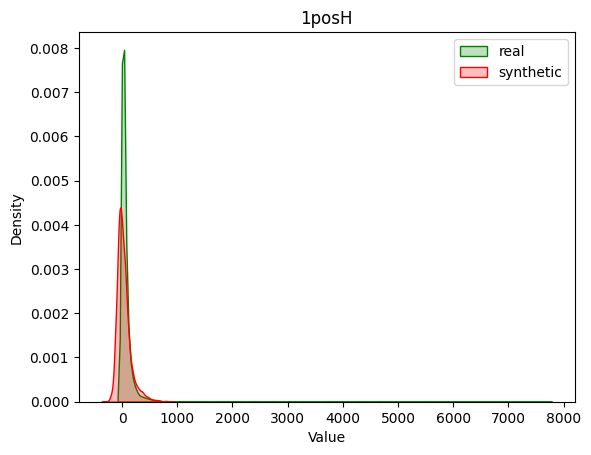

In [10]:
syn=pd.read_csv('/content/drive/MyDrive/transcriptomics-data/synthetic_data_dragan.csv')


# Create a KDE plot for both datasets
sns.kdeplot(data['1posH'], shade=True, color="green", label="real")
sns.kdeplot(syn['1posH'], shade=True, color="red", label="synthetic")

# Adding labels and a legend
plt.title('1posH')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [11]:
from scipy.stats import wasserstein_distance
distance = []

for col in data.columns:
    distance = wasserstein_distance(data[col], syn[col])
    print(f"Feature: {col} | Wasserstein Distance: {distance:.3f}")

average_wasserstein_distance = np.mean(distance)
print(f"\nAverage Wasserstein Distance: {average_wasserstein_distance:.3f}")

Feature: Gene_symbol | Wasserstein Distance: 3094.879
Feature: NAME | Wasserstein Distance: 3019.432
Feature: Foldchange | Wasserstein Distance: 0.910
Feature: PValue | Wasserstein Distance: 0.138
Feature: FDR | Wasserstein Distance: 0.011
Feature: 1posH | Wasserstein Distance: 50.906
Feature: 2posH | Wasserstein Distance: 247.151
Feature: 3posH | Wasserstein Distance: 179.515
Feature: 4posH | Wasserstein Distance: 376.997
Feature: 5posH | Wasserstein Distance: 341.325
Feature: 6posH | Wasserstein Distance: 137.014
Feature: 1negH | Wasserstein Distance: 42.010
Feature: 2negH | Wasserstein Distance: 79.527
Feature: 3negH | Wasserstein Distance: 56.168
Feature: 4negH | Wasserstein Distance: 192.963
Feature: 5negH | Wasserstein Distance: 92.057
Feature: 6negH | Wasserstein Distance: 181.506

Average Wasserstein Distance: 181.506


In [12]:
from scipy.stats import ks_2samp

stat=[]
for col in data.columns:
    stat, p_value = ks_2samp(data[col], syn[col])
    print(f"Feature: {col} | KS Statistic: {stat:.3f} | p-value: {p_value}")

avg_stat = np.mean(stat)
print(f"\nAverage KS Statistic: {avg_stat:.8f}")

Feature: Gene_symbol | KS Statistic: 0.388 | p-value: 0.0
Feature: NAME | KS Statistic: 0.416 | p-value: 0.0
Feature: Foldchange | KS Statistic: 0.510 | p-value: 0.0
Feature: PValue | KS Statistic: 0.318 | p-value: 0.0
Feature: FDR | KS Statistic: 0.545 | p-value: 0.0
Feature: 1posH | KS Statistic: 0.493 | p-value: 0.0
Feature: 2posH | KS Statistic: 0.821 | p-value: 0.0
Feature: 3posH | KS Statistic: 0.691 | p-value: 0.0
Feature: 4posH | KS Statistic: 0.954 | p-value: 0.0
Feature: 5posH | KS Statistic: 0.909 | p-value: 0.0
Feature: 6posH | KS Statistic: 0.680 | p-value: 0.0
Feature: 1negH | KS Statistic: 0.351 | p-value: 0.0
Feature: 2negH | KS Statistic: 0.400 | p-value: 0.0
Feature: 3negH | KS Statistic: 0.452 | p-value: 0.0
Feature: 4negH | KS Statistic: 0.871 | p-value: 0.0
Feature: 5negH | KS Statistic: 0.602 | p-value: 0.0
Feature: 6negH | KS Statistic: 0.820 | p-value: 0.0

Average KS Statistic: 0.82028571
